# 🌟 Machine Learning Assignment 3 - Predicting Car Prices! 🌟

This Jupyter notebook is a template for solving the assignment problem, i.e., Chaky company makes some car but he has difficulty setting the price for the car. 🌞. Here, I will try to apply the skills I've learned over the past lectures. This notebook contains the following structure:
- 🏢 **1. Setup**: Import block with all necessary imports (also provide some blocks with connection to drive, kaggle, and etc. for future use)
- 📥 **2. Loading the Data**: Loading, EDA, data cleaning, feature selection, and preprocess the dataset.
- 🧠 **3. Models**: Starter code for basic models to kickstart your experimentation.
- 📊 **4. Evaluation Metrics**: Tools to evaluate your models using various metrics.
- 📝 **5. Inference and Conclusion**: Testing the best model and generating Report.

Let's start! 🚀


## Some notes:
The typical workflow of data science project is following:
```
1. Problem Definition
- Objective: Clearly define the problem you're trying to solve. Understand the business or research goals and translate them into a data science problem.
Tasks:
- - Identify the key objectives and success metrics.
- - Understand the constraints and resources available.
- - Formulate hypotheses or research questions.
2. Data Collection
- Objective: Gather the necessary data from various sources, which could be internal databases, APIs, web scraping, or external datasets.
Tasks:
- - Identify data sources and acquire the data.
- - Integrate data from multiple sources if needed.
- - Ensure data privacy and compliance with regulations (e.g., GDPR).
3. Data Exploration and Analysis (Exploratory Data Analysis - EDA)
- Objective: Understand the data, its patterns, and any potential issues through visualization and basic statistical analysis.
Tasks:
- - Summarize the data using descriptive statistics.
- - Visualize distributions, correlations, and trends.
- - Identify patterns, outliers, and potential relationships between features.
- - Formulate additional hypotheses based on the data.
4. Data Preprocessing
- Objective: Clean and prepare the data for modeling.
Tasks:
- - Handle missing values (imputation or removal).
- - Handle outliers.
- - Encode categorical variables.
- - Normalize or standardize numerical features.
- - Split the data into training, validation, and test sets.
5. Feature Engineering
- Objective: Create new features or modify existing ones to improve model performance.
Tasks:
- - Create new features from existing data (e.g., interaction terms, polynomial features).
- - Apply feature scaling (normalization or standardization).
- - Transform features to handle skewness (e.g., log transformations).
- - Reduce dimensionality if necessary (e.g., PCA).
6. Model Selection
- Objective: Choose the appropriate machine learning models for the problem.
Tasks:
- - Compare different algorithms (e.g., linear models, decision trees, ensemble methods, neural networks).
- - Consider baseline models for comparison.
- - Choose models based on the problem type (e.g., classification, regression).
7. Model Training
- Objective: Train the chosen models on the preprocessed data.
Tasks:
- - Train the models using the training dataset.
- - Perform hyperparameter tuning (e.g., using grid search or random search).
- - Use cross-validation to evaluate model performance.
8. Model Evaluation
- Objective: Assess the model’s performance using relevant metrics and ensure it meets the project goals.
Tasks:
- - Evaluate model performance on the validation dataset.
- - Use appropriate metrics (e.g., accuracy, precision, recall, F1-score, RMSE).
- - Analyze model errors and refine the model if necessary.
9. Model Deployment
- Objective: Integrate the model into a production environment where it can be used to make predictions.
Tasks:
- - Deploy the model as a service (e.g., REST API, microservice).
- - Ensure scalability and monitor the model’s performance in production.
- - Handle model retraining as needed (e.g., with new data).
10. Monitoring and Maintenance
- Objective: Continuously monitor the model’s performance and maintain its accuracy over time.
Tasks:
- - Track model performance using key metrics.
- - Monitor for data drift and update the model if necessary.
- - Address any issues in production and ensure model reliability.
11. Documentation and Reporting
- Objective: Document the entire process and communicate the results to stakeholders.
Tasks:
- - Prepare detailed reports and visualizations.
- - Document the data, model, and processes.
- - Share insights and actionable recommendations with stakeholders.
12. Iteration and Optimization
- Objective: Refine the project by iterating over the steps to improve results.
Tasks:
- - Revisit earlier steps based on feedback and new insights.
- - Optimize the model and the workflow for better performance.
```


# 1. Setup

The following libraries are required to run this notebook. If you are running this on Colab it should be all smooth sailing. If you are running it locally please make sure you have all of these installed.

In [4]:
# Import section, basically importing everything what I need later + default imports
import os
import random

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mlflow

# For sklearn imports I will import them in model sections for better explanation purposes
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

## 2.1 DataLoading


First thing we need to do is load in the data. We will be looking at the cars dataset (shared for this assignment [cars](https://github.com/AIT-MachineLearning/a1-predicting-car-prices-eracoding)). This dataset is tabular and contains information regarding car details(year, brand, mileage, and etc.) and we need to predict the price of the car(regression).

In [5]:
# Loading the data
train_csv_path = '../dataset/cars.csv'
df = pd.read_csv(train_csv_path)

### Data Preprocessing and Label Encoding

We need to represent categorical data into numerical form via encoding. This step should be done before EDA

In [6]:
# Let's observe what are columns and their data types
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

The task is following (note: I will deal with nan valuese on the fly alongs tasks, I am thinking since its regression task our predictions is approximate (it is okay to change with mean/median based on distribution), but for classification tasks I think it is better to drop such rows. Therefore, I will keep them.):
```
1. Feature owner - map First owner to 1, ..., Test drive car to 5
2. Feature fuel - remove all rows with CNG and LPG because CNG and LPG use a different mileage system (km/kg) which is different from kmpl for Diesel and Petrol
3. Feature mileage - remove "kmpl" and convert to float
4. Feature engine - remove "CC" and convert to numerical
5. Feature max power - same as engine
6. Feature brand - take first word and remove other
7. Drop feature torque
8. Test Drive cars are expensive, so delete all samples
```

In [7]:
# task 1 - Feature owner - map First owner to 1, ..., Test drive car to 5
df_copy = df.copy()

# First Owner	5289
# Second Owner	2105
# Third Owner	555
# Fourth & Above Owner	174
# Test Drive Car 5

# Better to use one-hot encoding, but as per hw instructions doing mapping.
owner_map = {
    'owner': {
        "First Owner": 1,
        "Second Owner": 2,
        "Third Owner": 3,
        "Fourth & Above Owner": 4,
        "Test Drive Car": 5,
    }
}

df_copy.replace(owner_map, inplace=True)

# task8 - Test Drive cars are expensive, so delete all samples
df_copy = df_copy[df_copy.owner != 5]
print(df_copy.owner.value_counts())

# doing in such a sandwich way for testing purposes on the fly
df = df_copy.copy()

owner
1    5289
2    2105
3     555
4     174
Name: count, dtype: int64


C:\Users\eraco\AppData\Local\Temp\ipykernel_22248\1370062162.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.replace(owner_map, inplace=True)


In [8]:
# Encoder for binary categorical values
from sklearn.preprocessing import LabelEncoder

# defining encoder
le = LabelEncoder()

In [9]:
# task2 Feature fuel - remove all rows with CNG and LPG
df_copy = df.copy()

# df_copy['fuel'].value_counts()
# CNG	57
# LPG	38

print(df_copy.shape)
df_copy = df_copy[~df_copy.fuel.isin(['CNG', 'LPG'])]

print(df_copy.shape)
df_copy.fuel.value_counts()

# And also let's encode it
df_copy.fuel = le.fit_transform(df_copy.fuel)
print(df_copy.fuel.value_counts())


df = df_copy.copy()

(8123, 13)
(8028, 13)
fuel
0    4401
1    3627
Name: count, dtype: int64


In [10]:
# task6 - Feature brand - take first word and remove other
# same approach

df_copy = df.copy()

# Changing name to brand
df_copy.rename(columns = {'name': 'brand'}, inplace=True)
df_copy.brand = df_copy.brand.str.split().str[0]

print(df_copy.brand.isna().sum())

# Doing mapping

# Bad choice, I will proceed with one-hot encoding (though too much values)
# brand_name_map = {'brand': {v:k for k, v in zip(range(1, 33),
#         ['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
#        'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
#        'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
#        'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
#        'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'])
#     }
# }

# I will proceed with groupped one-hot encoding
group_map = {
    'Economy': ['Maruti', 'Tata', 'Hyundai', 'Datsun', 'Renault', 'Ford', 'Chevrolet', 'Fiat'],
    'Midrange': ['Honda', 'Toyota', 'Mahindra', 'Nissan', 'Skoda', 'Mitsubishi', 'Kia', 'MG'],
    'Luxury': ['Audi', 'BMW', 'Mercedes-Benz', 'Volvo', 'Jaguar', 'Lexus', 'Jeep', 'Land'],
    'Others': ['Daewoo', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot', 'Force']
}

# local mapper - later maybe need to define this in backend code
brand_to_group = {brand: group for group, brands in group_map.items() for brand in brands}

# mapping cars to its groups
df_copy.brand = df_copy.brand.map(brand_to_group)

# creating columns of brand groupping
df_encoded = pd.get_dummies(df_copy, columns=['brand'], drop_first=True)

df_encoded.head()

df = df_encoded.copy()

0


In [11]:
# Transmission feature has 2 classes only, so use LabelEncoder
df_copy = df.copy()

df_copy.transmission = le.fit_transform(df_copy.transmission)
print(df_copy.transmission.value_counts())

df = df_copy.copy()

transmission
1    6982
0    1046
Name: count, dtype: int64


In [12]:
# seller_type feature has 3 classes: individual,  dealer, trustmark dealer -> use one-hot encoding
df_copy = df.copy()

# one-hot encoding, drop_first=True to drop one not required column
df_copy = pd.get_dummies(df_copy, columns=['seller_type'], drop_first=True)
df_copy.head()

df = df_copy.copy()

In [13]:
# task3 - Feature mileage - remove "kmpl" and convert to float
# Hint: use df_copy.mileage.str.split

df.mileage = df.mileage.str.split().str[0].astype(float)

In [14]:
# task4 - Feature engine - remove "CC" and convert to numerical
# Same as task3

df.engine = df.engine.str.split().str[0].astype(float)

In [15]:
# task5 - Feature max power - same as engine

df.max_power = df.max_power.str.split().str[0].astype(float)

In [16]:
# task7 - dropping torque column
# so that it would not have impact on EDA - even though its bad practice

df.drop(columns=['torque'], inplace=True)

In [17]:
# Checking if everything is fine
# But probably, it would be better to keep torque and transfer for numerical form for the EDA basis
# I will test it in next iteration
df.dtypes

year                              int64
selling_price                     int64
km_driven                         int64
fuel                              int32
transmission                      int32
owner                             int64
mileage                         float64
engine                          float64
max_power                       float64
seats                           float64
brand_Luxury                       bool
brand_Midrange                     bool
brand_Others                       bool
seller_type_Individual             bool
seller_type_Trustmark Dealer       bool
dtype: object

### Now we can proceed with EDA

# 2.2 Exploratory Data Analysis (EDA)
DataFrame columns:
```
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        7907 non-null   object
 9   engine         7907 non-null   object
 10  max_power      7913 non-null   object
 11  torque         7906 non-null   object
 12  seats          7907 non-null   float64
 ```

### General Notes about EDA:
```
value_counts(): Frequency counts
outliers: the value that is considerably higher or lower from rest of the data

Value at 75% is Q3 and value at 25% is Q1 -> Q stands for "quartile"
Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR
IQR stands for "interquartile range"

We will use describe() method. Describe method includes:
count: number of entries
mean: average of entries
std: standart deviation
min: minimum entry
25%: first quantile
50%: median or second quantile
75%: third quantile
max: maximum entry
```

In [18]:
# Let's see all columns
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats', 'brand_Luxury',
       'brand_Midrange', 'brand_Others', 'seller_type_Individual',
       'seller_type_Trustmark Dealer'],
      dtype='object')

In [19]:
# Some basic info about each column
# We see there are null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          8028 non-null   int64  
 1   selling_price                 8028 non-null   int64  
 2   km_driven                     8028 non-null   int64  
 3   fuel                          8028 non-null   int32  
 4   transmission                  8028 non-null   int32  
 5   owner                         8028 non-null   int64  
 6   mileage                       7814 non-null   float64
 7   engine                        7814 non-null   float64
 8   max_power                     7820 non-null   float64
 9   seats                         7814 non-null   float64
 10  brand_Luxury                  8028 non-null   bool   
 11  brand_Midrange                8028 non-null   bool   
 12  brand_Others                  8028 non-null   bool   
 13  seller_t

## Plotting:


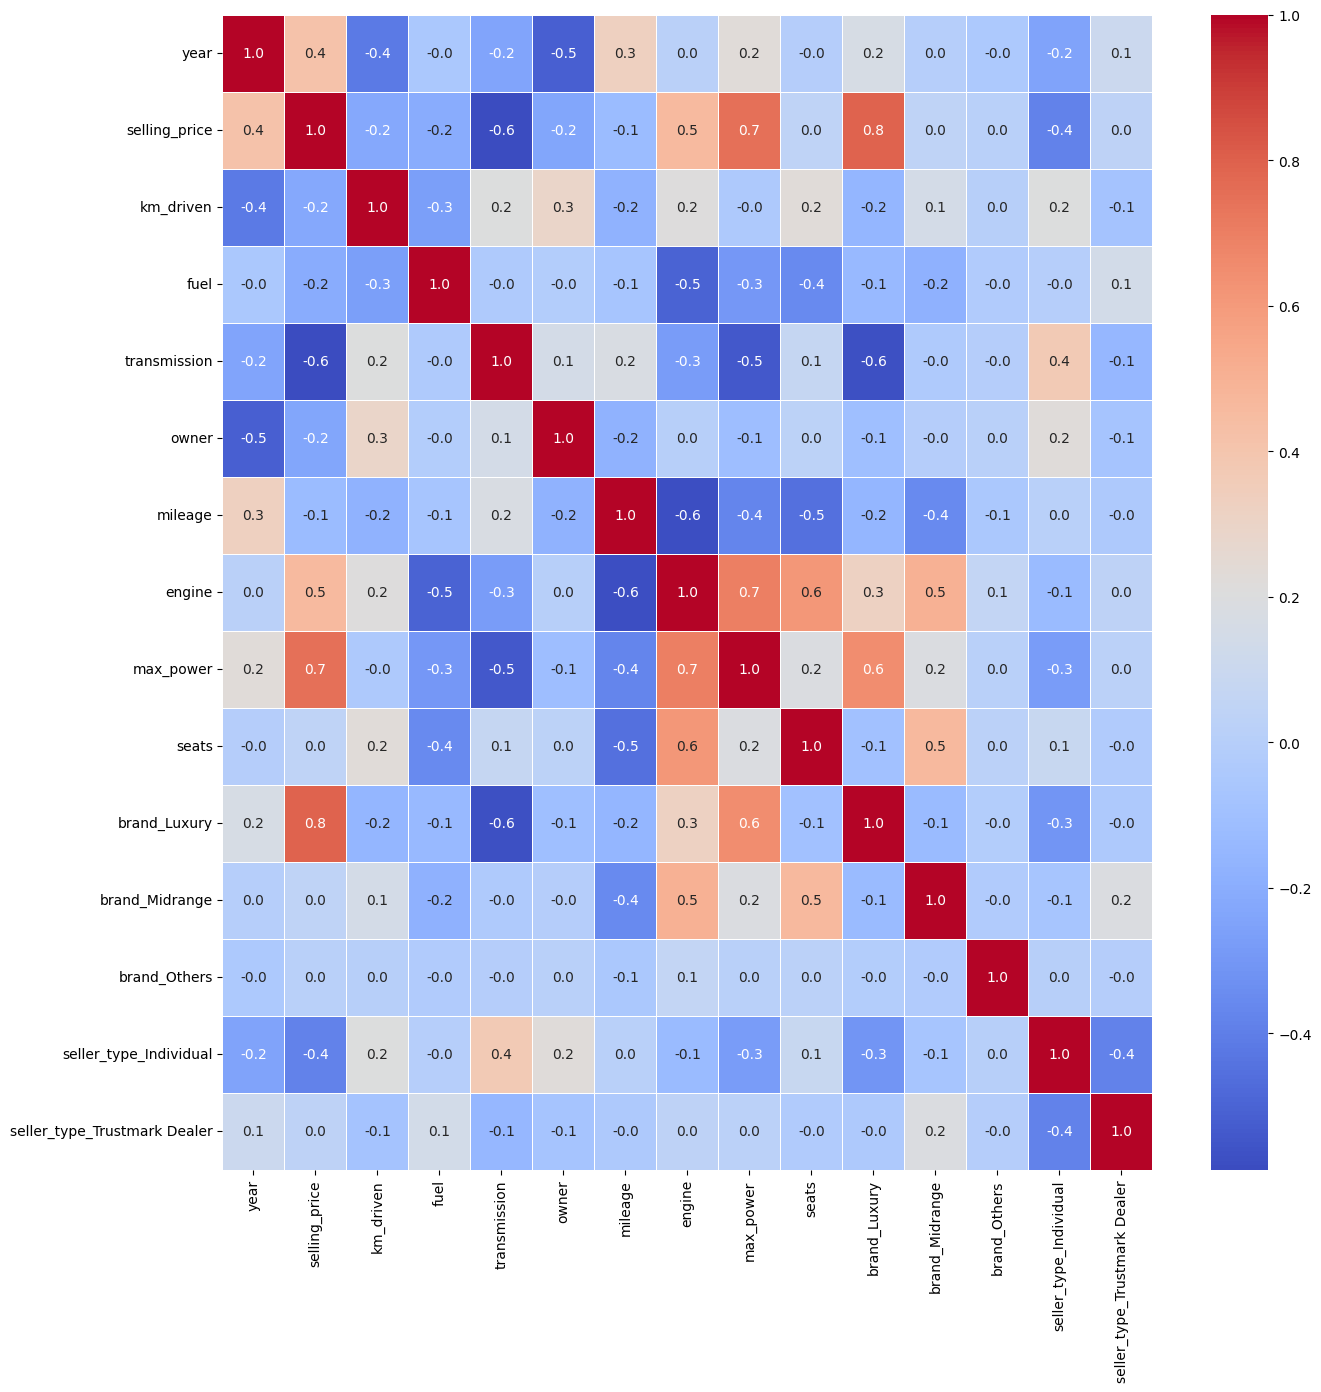

In [20]:
# # lets drop for now not number columns
# df_only_nums = df[['year', 'selling_price', 'km_driven', 'seats']]
# #only numbers

# previously was keeping categorical as categorical, but now we can plot all features
# print(df.corr())

# #correlation map
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="coolwarm")

# So the more red color, the more correlation
plt.show()

In [21]:
# Observing first 5 data
df.head(5)

# Observing last 5 data
#df.tail()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,brand_Luxury,brand_Midrange,brand_Others,seller_type_Individual,seller_type_Trustmark Dealer
0,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,False,False,False,True,False
1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,False,True,False,True,False
2,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,False,True,False,True,False
3,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,False,False,False,True,False
4,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,False,False,False,True,False


Let's try to plot some line, scatter and histogram plots. To choose between, there are some differences in plots:
- Line plot is better when x axis is time.
- Box plots: visualize basic statistics like outliers, min/max or quantiles
- Scatter is better when there is correlation between two variables
- Histogram is better when we need to see distribution of numerical data.
- Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

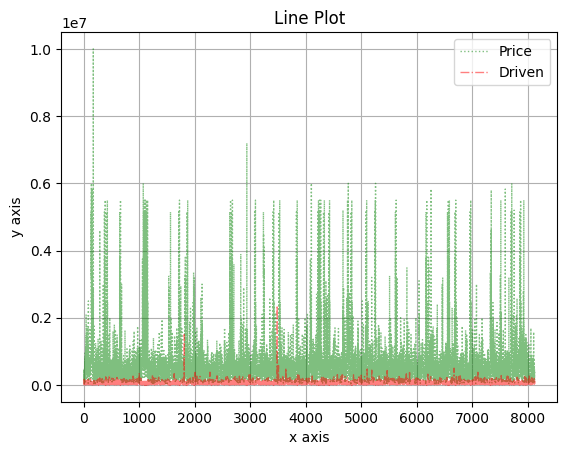

In [22]:
# Line plot
# It might be seen there is no correlation between features,
# but basically I am just exploring type of plots

# Line plot is better when x axis is time
df['selling_price'].plot(kind = 'line', color = 'g',label = 'Price',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
df['km_driven'].plot(color = 'r',label = 'Driven',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5, 1.0, 'Scatter Plot')

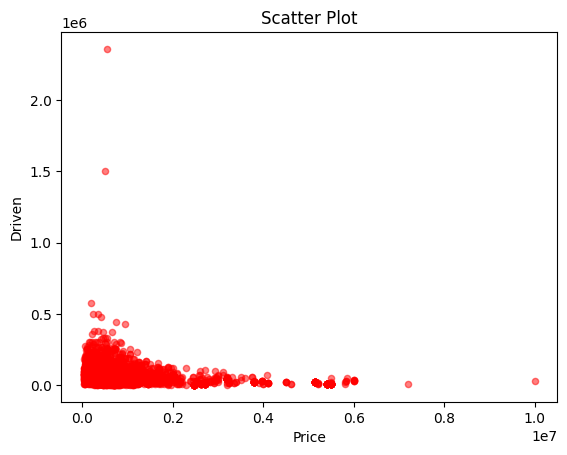

In [23]:
# Scatter plot
# Scatter is better when there is correlation between two variables

df.plot(kind='scatter', x='selling_price', y='km_driven',alpha = 0.5,color = 'red')
plt.xlabel('Price')              # label = name of label
plt.ylabel('Driven')
plt.title('Scatter Plot')

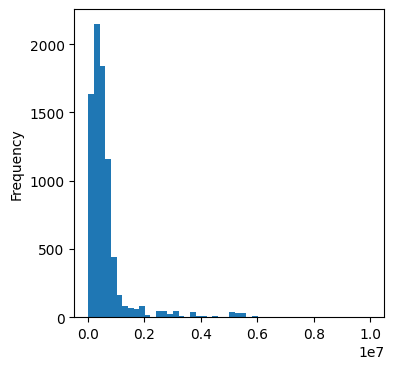

In [24]:
# Histogram
# bins = number of bar in figure
# Histogram is better when we need to see distribution of numerical data.

df['selling_price'].plot(kind = 'hist',bins = 50,figsize = (4,4))
plt.show()

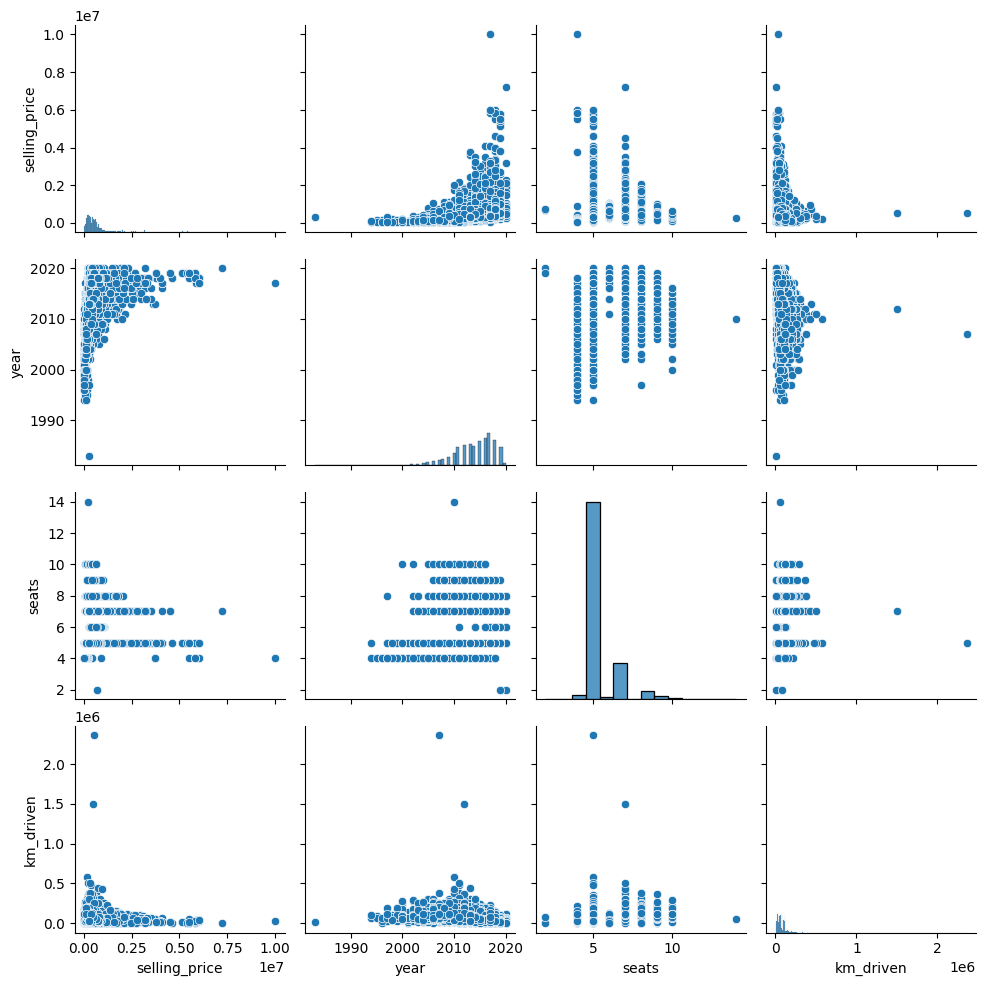

In [25]:
sns.pairplot(df[['selling_price', 'year', 'seats', 'km_driven']])

# From the result we can see that we need to normalize features

# 2.3 Feature Engineering

[08/18/2024] 1st attempt: I think there is no need to create new features, I will try with existing ones (created this section for future use - will require this)

# 2.4 Feature Selection
```
[08/18/2024] 1st attempt: I am thinking taking all features except the ones that we need to drop: torque
[08/20/2024] 2nd attempt: I will choose 5 features that are most important: max_power, engine, km_driven, mileage, and year
```

In [26]:
# Just to remind what are columns
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats', 'brand_Luxury',
       'brand_Midrange', 'brand_Others', 'seller_type_Individual',
       'seller_type_Trustmark Dealer'],
      dtype='object')

### Outliers

I want to handle them before proceeding to training ['year', 'km_driven', 'mileage', 'engine', 'max_power'] - will chose those only

[08/21/2024] 3rd attempt - trying with outliers before splitting the dataset

In [27]:
# To see all outliers

def outlier_count(col, data = df):
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])

    # calculate your inter quatile
    iqr = q75 - q25

    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [28]:
# Printing outliers per column
for col in ['year', 'km_driven', 'mileage', 'engine', 'max_power']:
    outlier_count(col)


---------------year---------------

Number of outliers: 78
Percent of data that is outlier: 0.97%

---------------km_driven---------------

Number of outliers: 168
Percent of data that is outlier: 2.09%


Let's not remove them, but cap them to a fixed value (5th or 95th percentile) - reduce impact of extreme values

In [29]:
# Capping outliers
def cap_outliers(df, column):
    lower_limit = df[column].quantile(0.05)
    upper_limit = df[column].quantile(0.95)
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

# applying for 'year' and 'km_driven' since there are only two outliers
# for chosen set of features
df = cap_outliers(df, 'year')
df = cap_outliers(df, 'km_driven')

In [30]:
# Printing outliers per column
for col in ['year', 'km_driven', 'mileage', 'engine', 'max_power']:
    outlier_count(col)

In [31]:
# Same approach as in label encoding
df_copy = df.copy()

# shape (m,)
y = df_copy['selling_price']
# df_copy = df_copy.drop(columns=['selling_price'])
print(y.shape)
assert len(y.shape) == 1

# Taking shape (m, n)
X = df_copy[['year', 'km_driven', 'mileage', 'engine', 'max_power']]
print(X.shape)
assert len(X.shape) == 2

(8028,)
(8028, 5)


Converting the regression problem into classification problem:

In [32]:
test = y.copy()

In [33]:
q25 = y.quantile(0.25)
q50 = y.quantile(0.50)
q75 = y.quantile(0.75)

def regr_to_class(val):
    return 0 if val < q25 else 1 if q25 <= val < q50 else 2 if q50 <= val < q75 else 3

y = y.apply(regr_to_class)

In [35]:
q25, q50, q75

(260000.0, 450000.0, 680000.0)

In [36]:
y.value_counts()

selling_price
2    2113
3    2013
0    2003
1    1899
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset, will proceed with processing it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)

# 2.5 Preprocessing

In [ ]:
# Let's see what is the train dataset size
X_train.shape

(6984, 5)

In [ ]:
# Same for test
X_test.shape

(1044, 5)

### NUll values

In [ ]:
# Let's observe all null values in training set (did not deal with them - to avoid data leakage)
X_train.isna().sum()

,0
year,0
km_driven,0
mileage,187
engine,187
max_power,181


In [ ]:
# Same for the testing dataset
X_test.isna().sum()

,0
year,0
km_driven,0
mileage,27
engine,27
max_power,27


In [ ]:
# Removing null values for mileage
print(X_train.mileage.mean(), X_train.mileage.median())

# sns.distplot(X_train, x=X_train.mileage)

# Interchanging nan values with mean - the distribution is normal
X_train.mileage.fillna(X_train.mileage.mean(), inplace=True)
X_test.mileage.fillna(X_train.mileage.mean(), inplace=True)

19.38204354862439 19.3


<ipython-input-37-4dc187eca875>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train.mileage.fillna(X_train.mileage.mean(), inplace=True)
<ipython-input-37-4dc187eca875>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# df_copy.engine.isna().sum() # 214
print(X_train.engine.mean(), X_train.engine.median())

# sns.distplot(X_train, x=X_train['engine'])

# Interchanging nan values with median - the distribution is skewed
X_train.engine.fillna(X_train.engine.mean(), inplace=True)
X_test.engine.fillna(X_train.engine.mean(), inplace=True)

1463.756068853906 1248.0


<ipython-input-38-9d9e8b96bc3f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train.engine.fillna(X_train.engine.mean(), inplace=True)
<ipython-input-38-9d9e8b96bc3f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# df_copy.max_power.isna().sum() # 208
print(X_train.max_power.mean(), X_train.max_power.median())

# sns.distplot(X_train, x=X_train.max_power) # distribution is skewed a little

# Interchanging nan values with median - the distribution is skewed
X_train.max_power.fillna(X_train.max_power.mean(), inplace=True)
X_test.max_power.fillna(X_train.max_power.mean(), inplace=True)

91.74543877701014 82.85


<ipython-input-39-9d3173a3f2c6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train.max_power.fillna(X_train.max_power.mean(), inplace=True)
<ipython-input-39-9d3173a3f2c6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# # And we want to remove all null values from seats feature - 214 rows
# print(X_train.seats.mean(), X_train.seats.median())

# # sns.distplot(X_train, x=X_train.seats) # distribution is skewed a little

# # Interchanging nan values with median - the distribution is skewed
# X_train.seats.fillna(X_train.seats.mean(), inplace=True)
# X_test.seats.fillna(X_train.seats.mean(), inplace=True)

In [ ]:
# Now verify if everything is fine
X_train.isna().sum()

,0
year,0
km_driven,0
mileage,0
engine,0
max_power,0


In [ ]:
# Same for test set
X_test.isna().sum()

,0
year,0
km_driven,0
mileage,0
engine,0
max_power,0


In [ ]:
# Just to be sure
y_train.isna().sum()

0

In [ ]:
# Now we can proceed
y_test.isna().sum()

0

## Scaling

In [ ]:
# Observing what need to be scaled
X_train.head()

,year,km_driven,mileage,engine,max_power
4419,2016.0,68089.0,19.16,2494.0,157.70
6103,2011.0,81500.0,14.84,2143.0,167.62
7893,2011.0,140000.0,14.40,1598.0,103.60
7427,2016.0,120000.0,13.58,2499.0,72.40
1448,2018.0,30000.0,18.60,1197.0,81.83


In [ ]:
# We need to scale all numerics whose difference is large
from sklearn.preprocessing import StandardScaler

# After observing above, we can proceed with the following columns
col_names = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

# Defining Scaler
sc = StandardScaler()

# Scaling is performed
X_train[col_names] = sc.fit_transform(X_train[col_names])
X_test[col_names] = sc.transform(X_test[col_names])

In [ ]:
# Let's see if its fine
X_train.head()

,year,km_driven,mileage,engine,max_power
4419,0.559461,0.028728,-0.056110,2.064080,1.885161
6103,-0.806911,0.364115,-1.147758,1.360856,2.168701
7893,-0.806911,1.827105,-1.258944,0.268956,0.338836
7427,0.559461,1.326937,-1.466156,2.074098,-0.552945
1448,1.106010,-0.923816,-0.197620,-0.534442,-0.283410


In [ ]:
# Same for test set
X_test.head()

,year,km_driven,mileage,engine,max_power
5948,-0.806911,-0.798774,-1.107327,-0.191846,-0.049889
6039,0.559461,1.076853,0.072766,0.236900,0.984805
3069,0.286187,-0.173565,0.285031,-0.933136,-0.706149
6531,0.012912,0.326602,-0.094014,-0.005522,0.477462
322,1.106010,-0.948824,1.166941,-0.556481,-0.508070


In [ ]:
# Same for selling price, we want to do np.log transformation
# y_train = np.log(y_train)
# y_train

# We dont need to log the actual target set - so leaving it
# y_test = np.log(y_test)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# 3. Modeling

Configuring MlFlow workplace


In [ ]:
# Task 3
mlflow_url = 'https://mlflow.ml.brain.cs.ait.ac.th/'
mlflow.set_tracking_uri(mlflow_url)

os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

os.environ["LOGNAME"] = "st125457-ulugbek"

mlflow.set_experiment(experiment_name="st125457-a3-ulugbek-experiment")

import logging

# Setting only logging warning messages, later it would make output neat
logging.getLogger("mlflow").setLevel(logging.WARNING)

In [ ]:
import json

# Task 2
class RidgePenalty:

    def __init__(self, l):
        self.l = l

    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        return self.l * 2 * theta


class LogisticRegression:

    def __init__(self, k, n, method='batch', batch_size=512, alpha=0.001, max_iter=5000, regularization=True, l=0.1):
        self.k = k
        self.n = n
        self.method = method
        self.alpha = alpha
        self.max_iter = max_iter
        self.batch_size = batch_size

        self.l = l

        self.reg_flag = regularization
        self.regularization = RidgePenalty(self.l) if self.reg_flag else None

        self.W = None


    def fit(self, X, Y):
        if self.method not in ["batch", "minibatch", "sto"]:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

        # Creating new set of weights each time fit function is called is bad idea
        # probably we do not want to do it that way -> initialization during init? - for kfold, introduce flag?
        np.random.seed(42)
        self.W = np.random.rand(self.n, self.k)

        self.losses = []

        Y = np.eye(self.k)[Y]
        # with mlflow.start_run(run_name=f"{type(self).__name__}", nested=True):
        #     params = {"method": self.method, "lr": self.alpha, "reg": type(self).__name__, "regularization": self.reg_flag}
        #     mlflow.log_params(params=params)
        self.val_loss_old = np.infty

        if self.method == "batch":
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)

                self.W = self.W - self.alpha * grad

                # if i % 10 == 0:
                    # print(f"Loss at iteration {i}", loss)

                    # if i == 30:
                    #    self.alpha = 0.0009025
                if i % 125 == 0:
                    self.learning_rate_decay(i)

                    # print(f'Learning rate: ', self.alpha)

                mlflow.log_metric(key="train_loss", value=loss, step=i)

        elif self.method == "minibatch":
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+self.batch_size]
                batch_Y = Y[ix:ix+self.batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 10 == 0:
                    # print(f"Loss at iteration {i}", loss)

                    if i % 90 == 0:
                        self.learning_rate_decay(i)
                    # print(f'Learning rate: ', self.alpha)
                mlflow.log_metric(key="train_loss", value=loss, step=i)

        elif self.method == "sto":
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]

                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)

                self.W = self.W - self.alpha * grad

                # if i % 500 == 0:
                #     print(f"Loss at iteration {i}", loss)

                mlflow.log_metric(key="train_loss", value=loss, step=i)

        return self


        # if np.allclose(loss, self.val_loss_old):
        #     print(f"Break - Loss at iteration {i}", loss)

        # self.val_loss_old = loss

        # print(f"Time taken: {time.time() - start_time}")

    def learning_rate_decay(self, epoch, min_lr=1e-8):
        new_alpha = self.alpha * (0.95 ** (epoch // 10))
        # new_alpha = self.alpha * 0.1
        self.alpha = max(new_alpha, min_lr)

    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def score(self, X, Y):
        """Score method required by GridSearchCV."""
        Y_pred = self.predict(X)
        accuracy = np.mean(Y_pred == Y)
        return accuracy

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)

        loss = - np.sum(Y * np.log(h)) / m

        if self.reg_flag:
            loss += self.regularization(self.W) / (m) # Divide by 2*m to normalize

        error = h - Y

        grad = self.softmax_grad(X, error)

        if self.reg_flag:
            grad += (self.regularization.derivation(self.W) / m)

        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error

    def h_theta(self, X, W):
        return self.softmax(X @ W)

    # For performing GridSearch
    def get_params(self, deep=True):
        """Get the parameters for GridSearchCV."""
        return {
            'k': self.k,
            'n': self.n,
            'method': self.method,
            'batch_size': self.batch_size,
            'alpha': self.alpha,
            'max_iter': self.max_iter,
            'regularization': self.reg_flag,
            'l': self.l
        }
    # For performing GridSearch
    def set_params(self, **params):
        """Set the parameters for GridSearchCV."""
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    # Task 1
    @staticmethod
    def accuracy(y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        total_predictions = len(y_true)

        return correct_predictions / total_predictions

    @staticmethod
    def precision(y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FP = np.sum((y_true != class_label) & (y_pred == class_label))

        return TP / (TP + FP) if TP + FP > 0 else 0.0

    @staticmethod
    def recall(y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FN = np.sum((y_true == class_label) & (y_pred != class_label))

        return TP / (TP + FN) if TP + FN > 0 else 0.0

    @staticmethod
    def f1_score(y_true, y_pred, class_label):
        P = LogisticRegression.precision(y_true, y_pred, class_label)
        R = LogisticRegression.recall(y_true, y_pred, class_label)

        return 2 * P * R / (P + R) if (P + R) > 0 else 0.0

    @staticmethod
    def macro_precision(y_true, y_pred):
        classes = np.unique(y_true)
        precisions = [LogisticRegression.precision(y_true, y_pred, class_label) for class_label in classes]

        return np.mean(precisions)

    @staticmethod
    def macro_recall(y_true, y_pred):
        classes = np.unique(y_true)
        recalls = [LogisticRegression.recall(y_true, y_pred, class_label) for class_label in classes]

        return np.mean(recalls)

    @staticmethod
    def macro_f1(y_true, y_pred):
        classes = np.unique(y_true)
        f1_scores = [LogisticRegression.f1_score(y_true, y_pred, class_label) for class_label in classes]

        return np.mean(f1_scores)

    @staticmethod
    def weighted_precision(y_true, y_pred):
        classes = np.unique(y_true)
        total_samples = len(y_true)

        weights = [(np.sum(y_true == class_label) / total_samples) for class_label in classes]
        precisions = [LogisticRegression.precision(y_true, y_pred, class_label) for class_label in classes]

        return np.sum([precision * w_coef for precision, w_coef in zip(precisions, weights)])

    @staticmethod
    def weighted_recall(y_true, y_pred):
        classes = np.unique(y_true)
        total_samples = len(y_true)

        weights = [(np.sum(y_true == class_label) / total_samples) for class_label in classes]
        recalls = [LogisticRegression.recall(y_true, y_pred, class_label) for class_label in classes]

        return np.sum([recall * w_coef for recall, w_coef in zip(recalls, weights)])

    @staticmethod
    def weighted_f1(y_true, y_pred):
        classes = np.unique(y_true)
        total_samples = len(y_true)

        weights = [(np.sum(y_true == class_label) / total_samples) for class_label in classes]
        f1_scores = [LogisticRegression.f1_score(y_true, y_pred, class_label) for class_label in classes]

        return np.sum([f1_score * w_coef for f1_score, w_coef in zip(f1_scores, weights)])

    @staticmethod
    def classification_report(y_true, y_pred):
        classes = np.unique(y_true)
        report = []
        header = f"{'Class':<16}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<10}"
        report.append(header)
        report.append("=" * len(header))

        for class_label in classes:
            precision = LogisticRegression.precision(y_true, y_pred, class_label)
            recall = LogisticRegression.recall(y_true, y_pred, class_label)
            f1 = LogisticRegression.f1_score(y_true, y_pred, class_label)
            support = np.sum(y_true == class_label)

            report.append(
                f"{class_label:<16}{precision:<12.4f}{recall:<12.4f}{f1:<12.4f}{support:<10}"
            )

        report.append("=" * len(header))
        macro_precision = LogisticRegression.macro_precision(y_true, y_pred)
        macro_recall = LogisticRegression.macro_recall(y_true, y_pred)
        macro_f1 = LogisticRegression.macro_f1(y_true, y_pred)

        weighted_precision = LogisticRegression.weighted_precision(y_true, y_pred)
        weighted_recall = LogisticRegression.weighted_recall(y_true, y_pred)
        weighted_f1 = LogisticRegression.weighted_f1(y_true, y_pred)

        accuracy = LogisticRegression.accuracy(y_true, y_pred)
        total_support = len(y_true)

        report.append(
            f"{'Accuracy':<16}{'':<12}{'':<12}{accuracy:<12.4f}{total_support:<10}"
        )

        report.append(
            f"{'Macro Avg':<16}{macro_precision:<12.4f}{macro_recall:<12.4f}{macro_f1:<12.4f}{total_support:<10}"
        )
        report.append(
            f"{'Weighted Avg':<16}{weighted_precision:<12.4f}{weighted_recall:<12.4f}{weighted_f1:<12.4f}{total_support:<10}"
        )

        return "\n".join(report)

    # For understanding which feature is important
    def plot_feature_importance(self, feature_names=None):
        if not hasattr(self, 'W'):
            raise ValueError("Model coefficients are not available. Fit the model first.")

        # Coefficients
        coefficients = self._coef()
        importance = np.abs(coefficients)

        # Assign default names if feature_names are not provided
        if feature_names is None:
            feature_names = [f"Feature {i}" for i in range(1, len(coefficients) + 1)]

        # Sort features by importance
        mask = np.argsort(importance)[::-1]
        sorted_importance = importance[mask]
        sorted_feature_names = np.array(feature_names)[mask]

        sorted_feature_names = sorted_feature_names.tolist() if isinstance(sorted_feature_names, np.ndarray) else sorted_feature_names
        sorted_importance = sorted_importance.tolist() if isinstance(sorted_importance, np.ndarray) else sorted_importance

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(sorted_feature_names, sorted_importance, color='skyblue')
        plt.xlabel('Coefficient Magnitude (Absolute)')
        plt.title('Feature Importance based on Coefficients')
        plt.gca().invert_yaxis()  # To display the most important feature at the top
        plt.show()

    def _coef(self):
        return self.W


    def save(self, file_path):
        with open(file_path, 'w') as f:
            json.dump({'coefficients': self.W.tolist()}, f)

    @classmethod
    def load(cls, file_path):
        with open(file_path, 'r') as f:
            data = json.load(f)
        return cls(theta=np.array(data['coefficients']))

In [ ]:
from sklearn.model_selection import GridSearchCV
k = 4

# Performing Gridsearch
model = LogisticRegression(k=k, n=X_train.shape[1])

param_grid = {
    'alpha': [0.001, 0.01],    # Learning rates
    'l': [0.01, 0.1, 1.0],          # Ridge regularization strengths
    'batch_size': [32, 64],    # Batch sizes
    'max_iter': [200],
    'method': ['batch', 'minibatch', 'sto']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'plot'

- What does support in the classification report means?

Support refers to the number of actual occurrences of each class in the true labels. It helps to understand the distribution of classes in your dataset, which is particularly useful when dealing with imbalanced datasets. It doesn't affect metrics like precision, recall, or F1-score directly, but it provides context about how many instances of each class were present when calculating these metrics.


In [ ]:
# k, n, method, batch_size=32, alpha=0.001, max_iter=5000, regularization=True, l=0.1):
methods = ['sto', 'minibatch', 'batch']
regularization = [False, True]

mlflow_params = []
k = len(np.unique(y_train))

for method in methods:
    for reg in regularization:
            mlflow_prm = f"LogisticRegression_{k=}_{method=}_{reg=}"
            mlflow_params.append(mlflow_prm)

            with mlflow.start_run(run_name=f"{mlflow_prm}", nested=True):
                params = {"method": method, "reg": "LogisticRegression", "regularization": reg}
                mlflow.log_params(params=params)
                print(params)
                model = LogisticRegression(k, X_train.shape[1], method=method, regularization=reg, max_iter=300, alpha=0.001)

                model.fit(X_train, y_train)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                yhat = model.predict(X_test)
                print(LogisticRegression.classification_report(y_test, yhat))
                print("Report: ", classification_report(y_test, yhat, digits=4))


{'method': 'sto', 'reg': 'LogisticRegression', 'regularization': False}
Class           Precision   Recall      F1-Score    Support   
0               0.4299      0.3446      0.3825      267       
1               0.2840      0.2584      0.2706      267       
2               0.2808      0.2840      0.2824      257       
3               0.0856      0.1107      0.0966      253       
Accuracy                                0.2510      1044      
Macro Avg       0.2701      0.2494      0.2580      1044      
Weighted Avg    0.2724      0.2510      0.2600      1044      
Report:                precision    recall  f1-score   support

           0     0.4299    0.3446    0.3825       267
           1     0.2840    0.2584    0.2706       267
           2     0.2808    0.2840    0.2824       257
           3     0.0856    0.1107    0.0966       253

    accuracy                         0.2510      1044
   macro avg     0.2701    0.2494    0.2580      1044
weighted avg     0.2724    0.2510  

In [ ]:
# So best model has the following params: {'method': 'minibatch', 'reg': 'LogisticRegression', 'regularization': True}
k = 4
method = 'minibatch'
reg = True
mlflow_prm = f"LogisticRegression_{k=}_{method=}_{reg=}"
with mlflow.start_run(run_name=f"{mlflow_prm}", nested=True):
    params = {"method": method, "reg": "LogisticRegression", "regularization": reg}
    mlflow.log_params(params=params)
    print(params)
    model = LogisticRegression(k, X_train.shape[1], method=method, regularization=reg, max_iter=300, alpha=0.001)

    model.fit(X_train, y_train)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    yhat = model.predict(X_test)
    print(LogisticRegression.classification_report(y_test, yhat))
    print("Report: ", classification_report(y_test, yhat, digits=4))

{'method': 'minibatch', 'reg': 'LogisticRegression', 'regularization': True}
Class           Precision   Recall      F1-Score    Support   
0               0.5896      0.9363      0.7236      267       
1               0.6623      0.1910      0.2965      267       
2               0.5934      0.4202      0.4920      257       
3               0.6094      0.8696      0.7166      253       
Accuracy                                0.6025      1044      
Macro Avg       0.6137      0.6043      0.5572      1044      
Weighted Avg    0.6139      0.6025      0.5557      1044      
Report:                precision    recall  f1-score   support

           0     0.5896    0.9363    0.7236       267
           1     0.6623    0.1910    0.2965       267
           2     0.5934    0.4202    0.4920       257
           3     0.6094    0.8696    0.7166       253

    accuracy                         0.6025      1044
   macro avg     0.6137    0.6043    0.5572      1044
weighted avg     0.6139    0.6

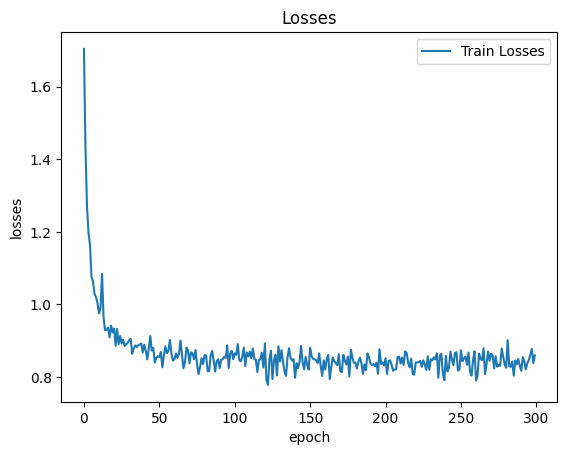

In [ ]:
model.plot()

In [67]:
# Saving the model
import joblib

# save the model to disk
model_name = 'Logistic_regression'
filename = f'{model_name}_model.pkl'
joblib.dump(model, filename)

model.save(f'{model_name}_weights.json')
# with open('polynomial_regression_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

# Report - Conclusion

So regarding the findings, let's break it down into parts:
1. I have been using the same features
2. The loss function's result is not the best, but since we are mapping range of values (wide range) into single class, I suppose this result is fine.
3. Problem with dataset has arranged, since we mapped regression problem into classification - slight errors in prediction now cause to fall down into another class if the values of regression problem is at the border of the class.
4. Possible understanding is choosing more features and feature engineering which will increase the results.
5. Implemented also the possibility to run GridSearch on the model - was running like 10 hours based on the params provided above - and it still was running - infinite runner :)
6. More details regarding scores can be found on ML Flow.
7. Also implemented learning rate decay
